<a href="https://colab.research.google.com/github/NithyaConnect/ds-phython/blob/main/census_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10

In [ ]:
path="/content/drive/MyDrive/clusterring glearn/census.xlsx" 
df_test=pd.read_excel(path)
df=df_test.copy()


In [ ]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [ ]:
df_number = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])


In [ ]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"seem to have {n_duplicates} duplicates in database.")

seem to have 0 duplicates in database.


In [ ]:
df.shape

(640, 62)

In [ ]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
gender_ratio     0
Length: 62, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      640 non-null    int64  
 1   Dist.Code       640 non-null    int64  
 2   State           640 non-null    object 
 3   Area Name       640 non-null    object 
 4   No_HH           640 non-null    int64  
 5   TOT_M           640 non-null    int64  
 6   TOT_F           640 non-null    int64  
 7   M_06            640 non-null    int64  
 8   F_06            640 non-null    int64  
 9   M_SC            640 non-null    int64  
 10  F_SC            640 non-null    int64  
 11  M_ST            640 non-null    int64  
 12  F_ST            640 non-null    int64  
 13  M_LIT           640 non-null    int64  
 14  F_LIT           640 non-null    int64  
 15  M_ILL           640 non-null    int64  
 16  F_ILL           640 non-null    int64  
 17  TOT_WORK_M      640 non-null    int

Numerical feature distribution

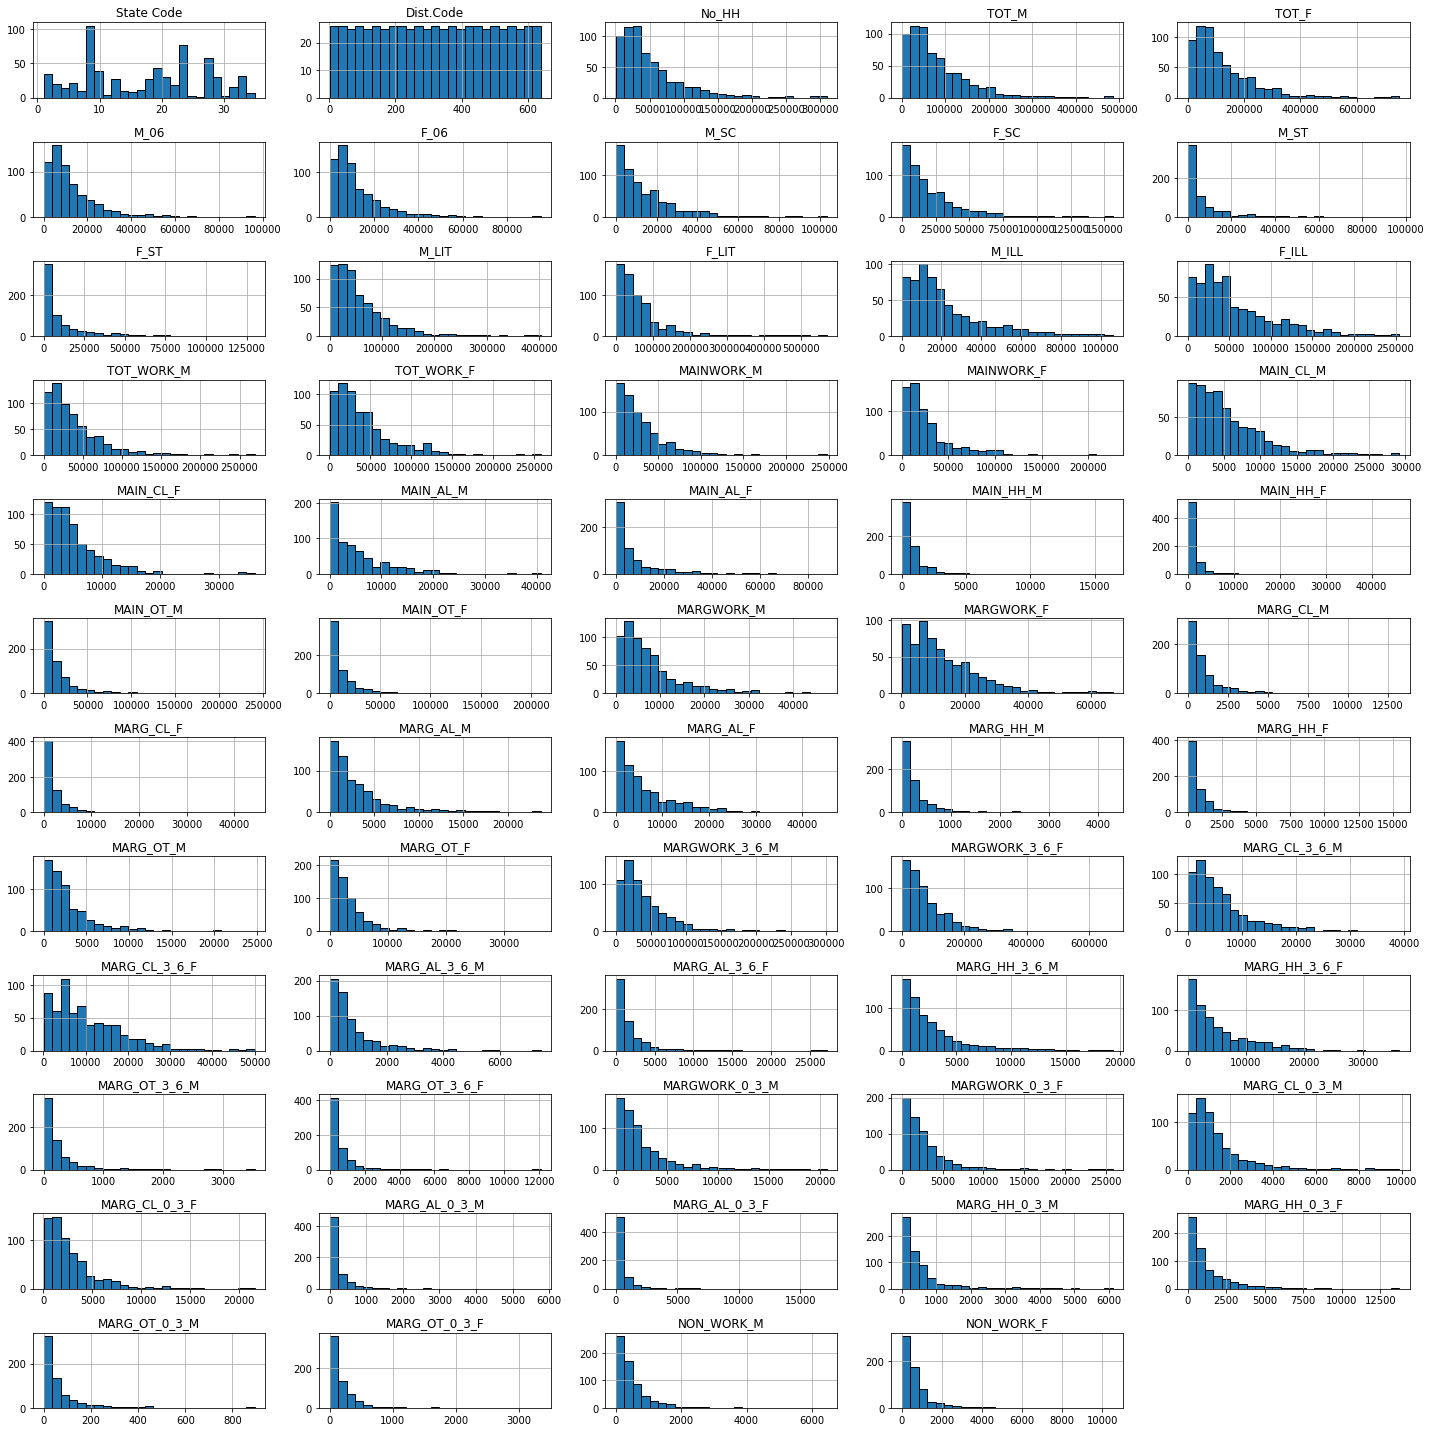

In [ ]:
df.hist(bins=25, figsize=(20,20), layout=(-1, 5), edgecolor="black")
plt.tight_layout();


insight :Data need to be normalized for further statistical calculations

In [ ]:
df_number = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])


In [ ]:
df.shape



(640, 61)

Cleaning data

In [ ]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())
df=df.dropna()


,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F


In [ ]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"seem to have {n_duplicates} duplicates in database.")


seem to have 0 duplicates in database.


In [ ]:
df["gender_ratio"]=df['TOT_M']/df['TOT_F']
df["gender_ratio"]

0      0.784938
1      0.847762
2      0.597045
3      0.661912
4      0.686802
         ...   
635    0.692131
636    0.569176
637    0.588973
638    0.649026
639    0.663582
Name: gender_ratio, Length: 640, dtype: float64

In [ ]:
df.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F', 'gender_ratio'],
      dtype='object')

In [ ]:
sagr=df.groupby(['State', 'Area Name']).sum()['gender_ratio'].sort_values(ascending=False)
print("States with maximum gender ratio")
sagr.head(10)

States with maximum gender ratio


State            Area Name     
Lakshadweep      Lakshadweep       0.868061
Jammu & Kashmir  Badgam            0.847762
Uttar Pradesh    Mahamaya Nagar    0.847313
Rajasthan        Dhaulpur          0.846911
Uttar Pradesh    Baghpat           0.844003
Meghalaya        Jaintia Hills     0.840393
NCT of Delhi     North East        0.838542
Haryana          Palwal            0.831138
Uttar Pradesh    Kannauj           0.817231
                 Agra              0.815491
Name: gender_ratio, dtype: float64

In [ ]:
print("States with minimum gender ratio")
sagr.tail(10)

States with minimum gender ratio


State             Area Name    
Andhra Pradesh    East Godavari    0.463082
Odisha            Bargarh          0.461902
Himachal Pradesh  Kinnaur          0.459871
Odisha            Kalahandi        0.455369
Tamil Nadu        Erode            0.453148
Odisha            Baudh            0.451455
Andhra Pradesh    West Godavari    0.450076
Tamil Nadu        Virudhunagar     0.449352
Odisha            Koraput          0.440769
Andhra Pradesh    Krishna          0.437972
Name: gender_ratio, dtype: float64

In [ ]:
df_gender=df[['TOT_M', 'TOT_F', 'M_06', 'F_06','M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL','TOT_WORK_M','TOT_WORK_F']]


<AxesSubplot:>

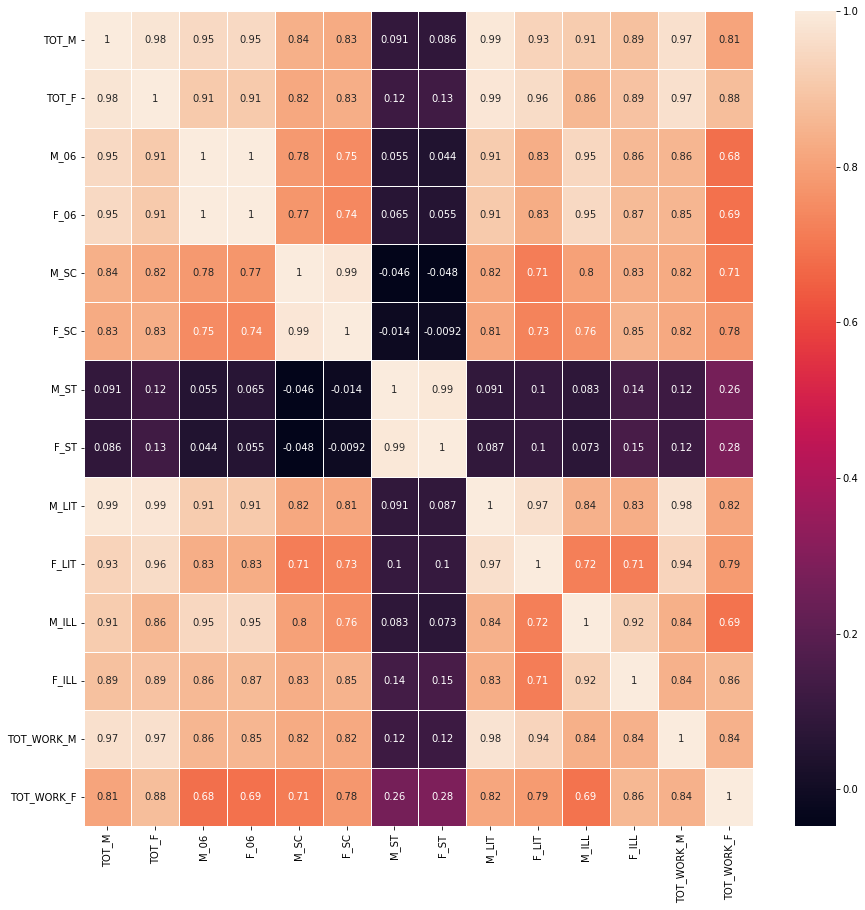

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))        
sns.heatmap(df_gender.corr(), annot=True, linewidths=.5, ax=ax)

Variable for eda
STATE,TOT M,TOT_F,MALE_LIT,FEMALE_LIT,MALE_ILL,FEMALE_ILL,TOT_WORK_M,TOT_WORK_F

describing data

In [ ]:
df_gender=df_test[['TOT_M','TOT_F','TOT_WORK_M','TOT_WORK_F','MAINWORK_M','MAINWORK_F','MARGWORK_M','MARGWORK_F','NON_WORK_M','NON_WORK_F']].copy()
df_gender

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MARGWORK_M,MARGWORK_F,NON_WORK_M,NON_WORK_F
0,23388,29796,6723,3752,2763,1275,3960,2477,258,214
1,19585,23102,6982,4200,4628,1733,2354,2467,140,160
2,6546,10964,2775,4800,1940,2923,835,1877,67,61
3,2784,4206,1002,1118,491,408,511,710,116,59
4,20591,29981,5717,7692,2523,2267,3194,5425,180,478
...,...,...,...,...,...,...,...,...,...,...
635,8154,11781,3808,1328,3459,997,349,331,32,47
636,12346,21691,6458,5286,5619,4104,839,1182,110,170
637,1549,2630,715,1031,325,534,390,497,76,77
638,5200,8012,2707,2174,2098,1666,609,508,100,103


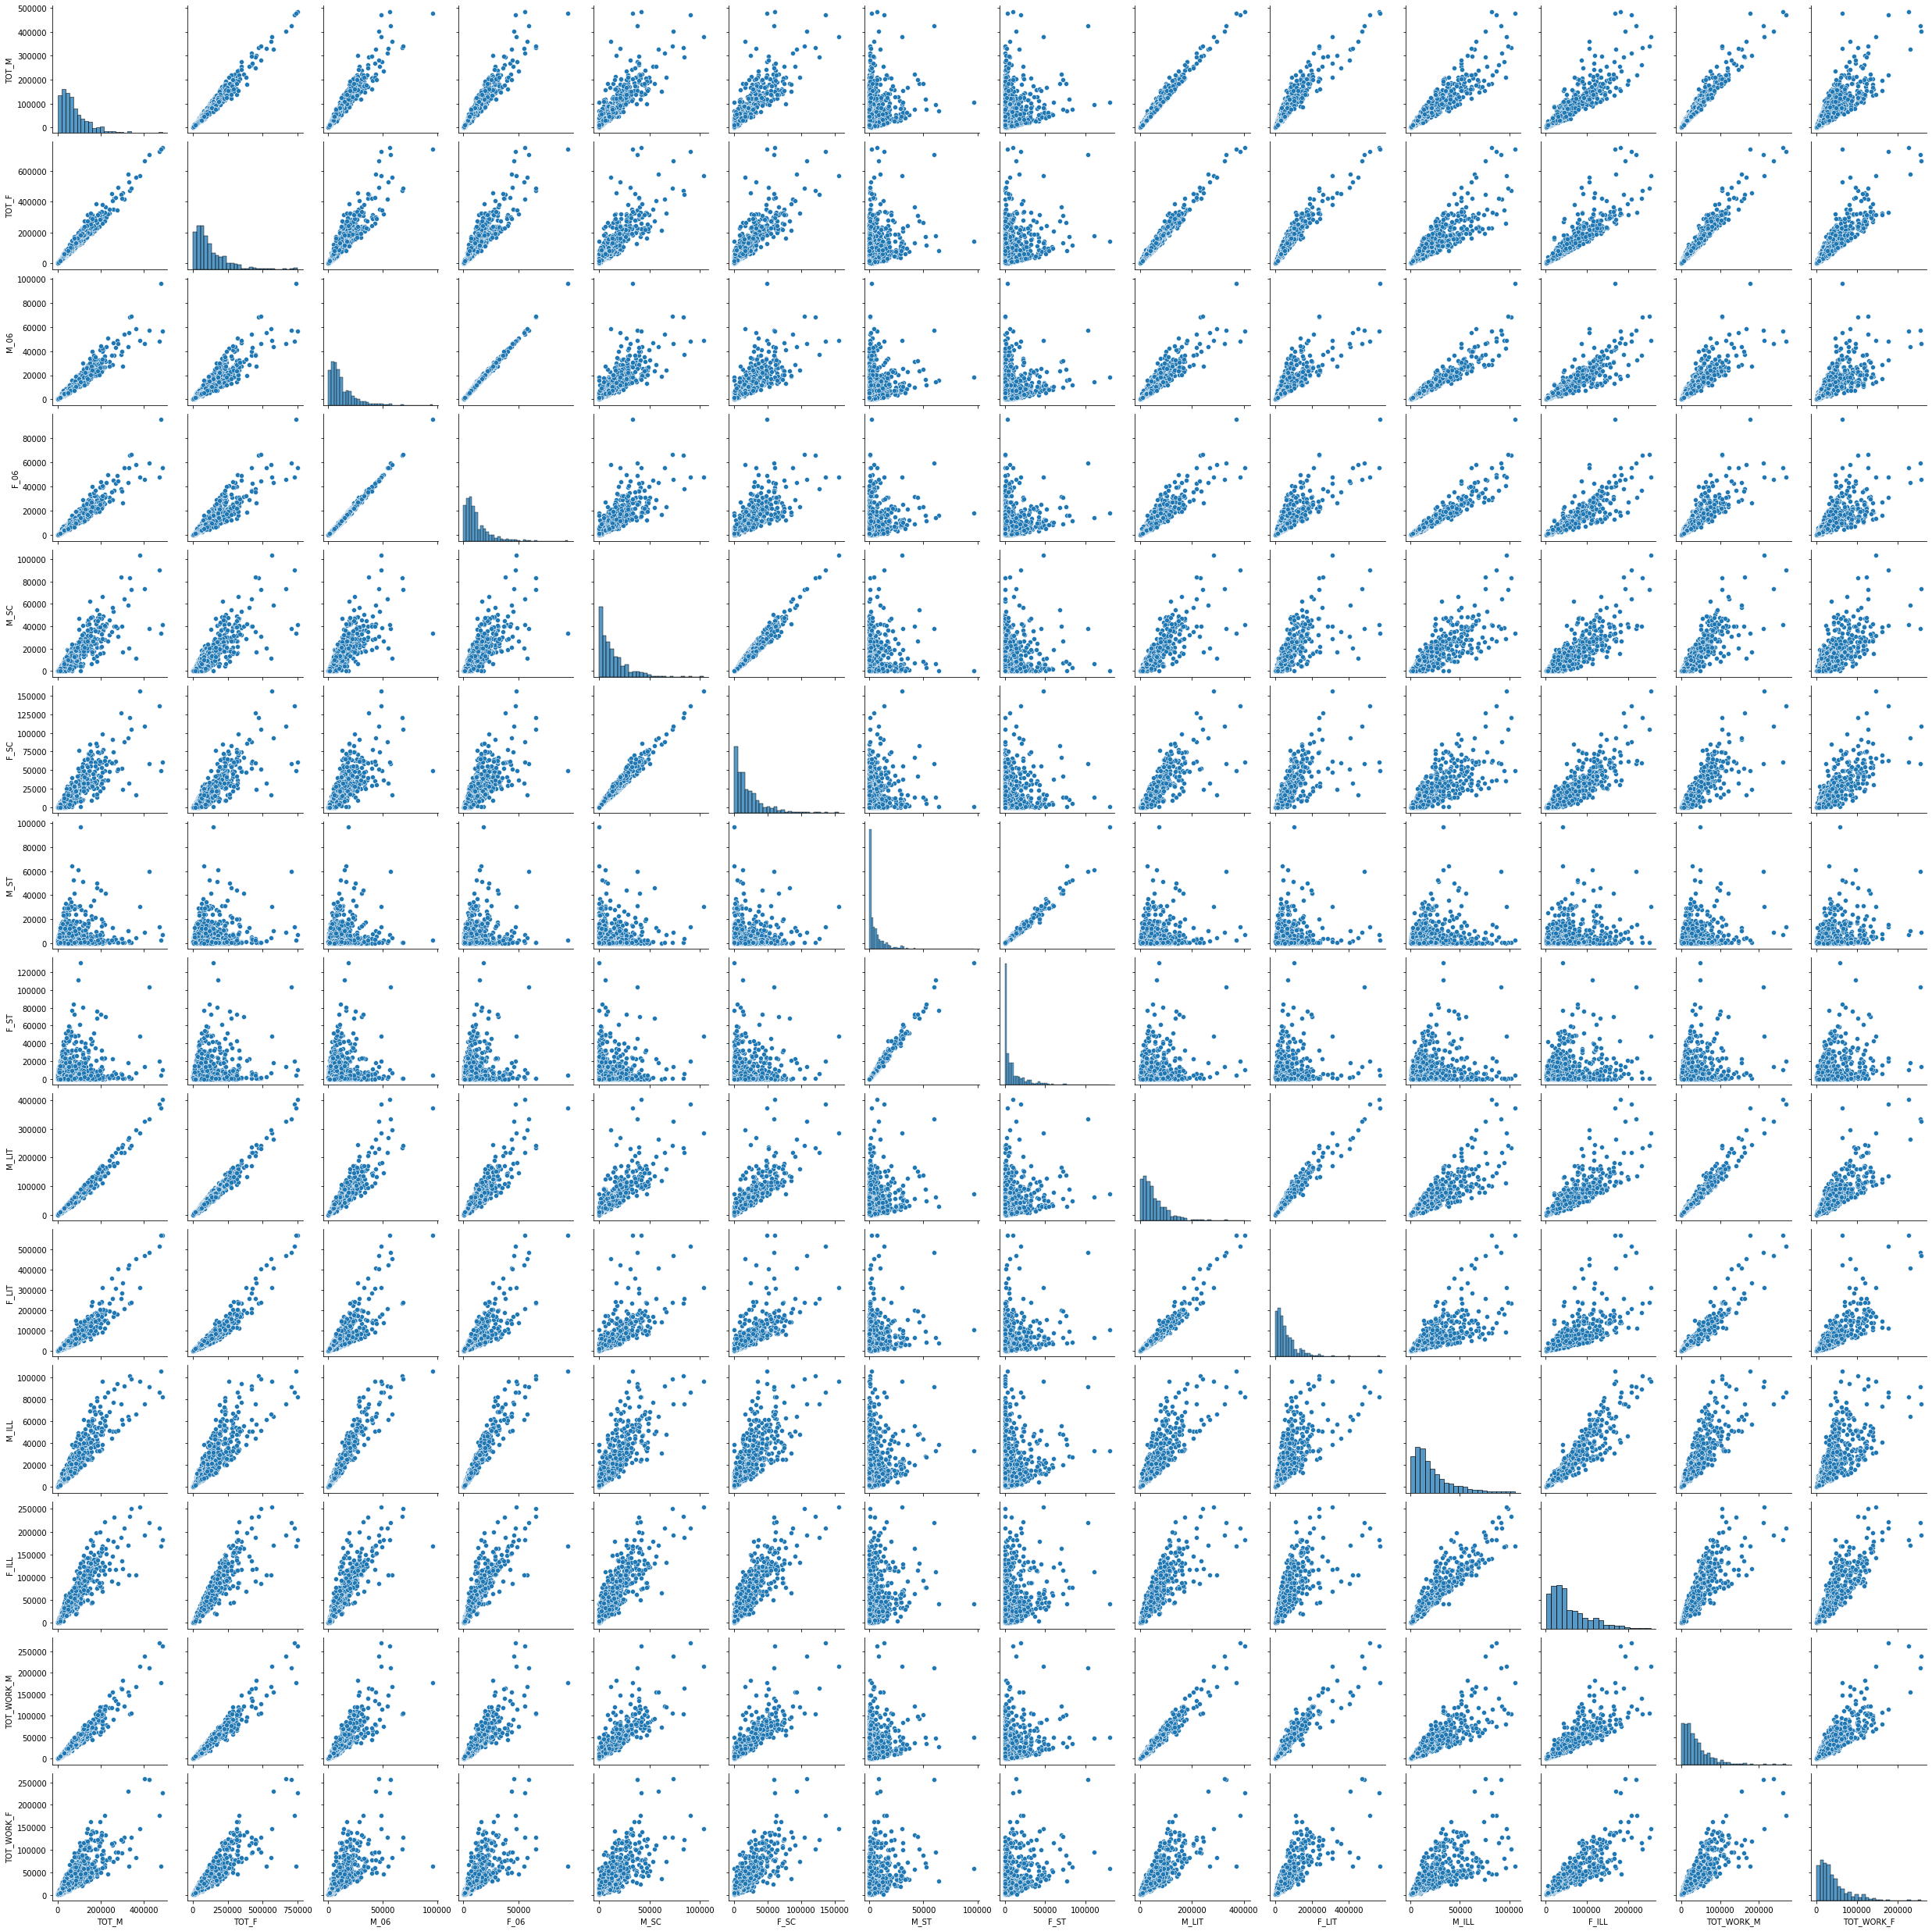

In [ ]:
sns.pairplot(data=df_gender)


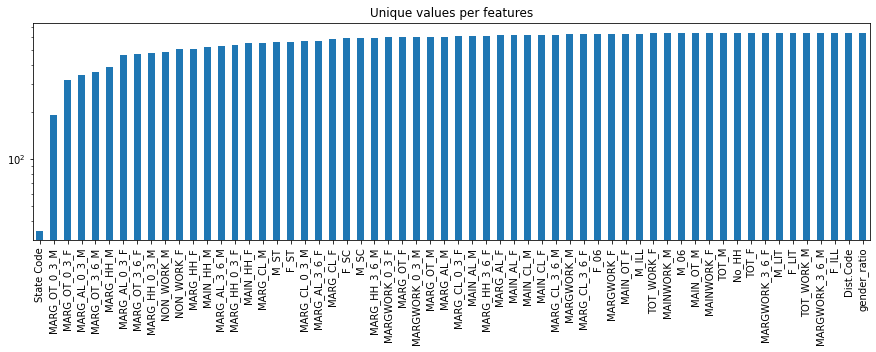

In [ ]:
#For each numerical feature compute number of unique entries 
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per features");



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.000000,9.000000,18.000000,24.00000,35.000000
Dist.Code,640.0,320.500000,184.896367,1.000000,160.750000,320.500000,480.25000,640.000000
No_HH,640.0,51222.871875,48135.405475,350.000000,19484.000000,35837.000000,68892.00000,310450.000000
TOT_M,640.0,79940.576563,73384.511114,391.000000,30228.000000,58339.000000,107918.50000,485417.000000
TOT_F,640.0,122372.084375,113600.717282,698.000000,46517.750000,87724.500000,164251.75000,750392.000000
...,...,...,...,...,...,...,...,...
MARG_OT_0_3_M,640.0,71.379688,107.897627,0.000000,14.000000,35.000000,79.00000,895.000000
MARG_OT_0_3_F,640.0,200.742188,309.740854,0.000000,43.000000,113.000000,240.00000,3354.000000
NON_WORK_M,640.0,510.014063,610.603187,0.000000,161.000000,326.000000,604.50000,6456.000000
NON_WORK_F,640.0,704.778125,910.209225,5.000000,220.500000,464.500000,853.50000,10533.000000


describing categorical variables

In [ ]:
# Extract descriptive properties of non-numerical features
df_cat=df.describe(exclude=["number", "datetime"])
df_cat

,State,Area Name
count,640,640
unique,35,635
top,Uttar Pradesh,Raigarh
freq,71,2


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


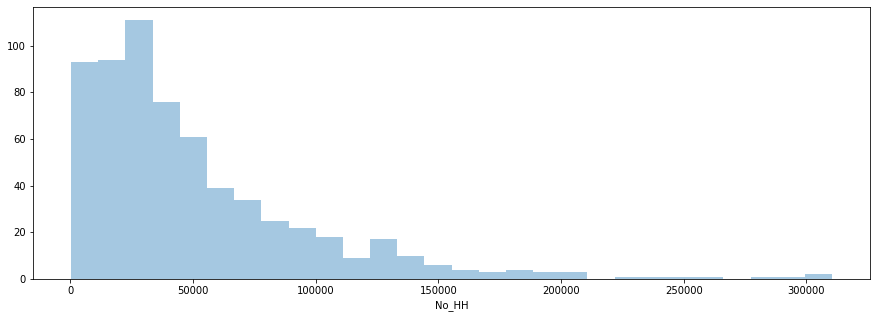

In [ ]:
plt.figure(figsize=(15,5))
pli.settile("Number if House Holds")
sns.distplot(df['No_HH'],kde=False)
plt.show()

<AxesSubplot:>

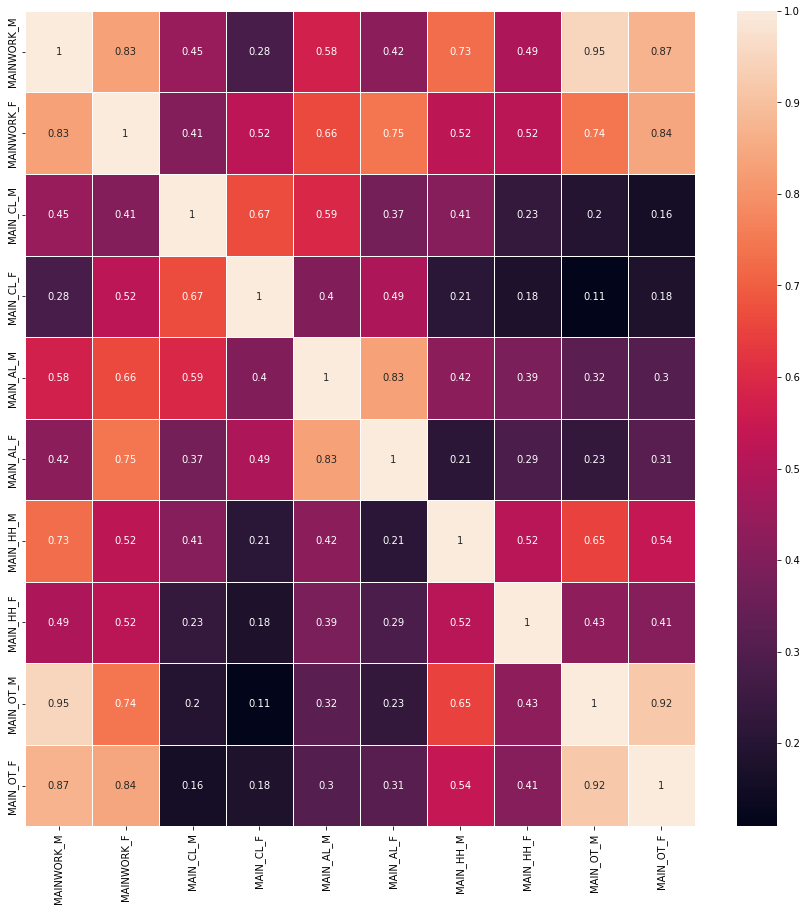

In [ ]:
df_mainwork=df[['MAINWORK_M', 'MAINWORK_F','MAIN_CL_M','MAIN_CL_F','MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M','MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F']]
fig, ax = plt.subplots(figsize=(15,15))        
sns.heatmap(df_mainwork.corr(), annot=True, linewidths=.5, ax=ax)


<AxesSubplot:>

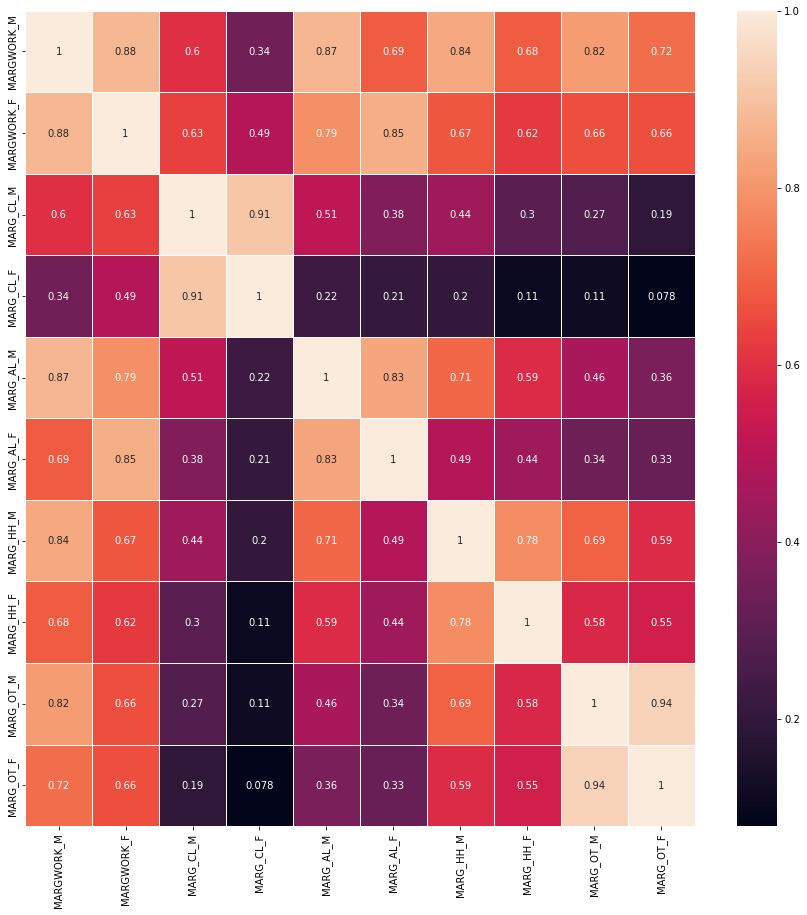

In [ ]:
df_marginwork=df[['MARGWORK_M','MARGWORK_F','MARG_CL_M','MARG_CL_F','MARG_AL_M', 'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F','MARG_OT_M', 'MARG_OT_F']]
fig, ax = plt.subplots(figsize=(15,15))        
sns.heatmap(df_marginwork.corr(), annot=True, linewidths=.5, ax=ax)

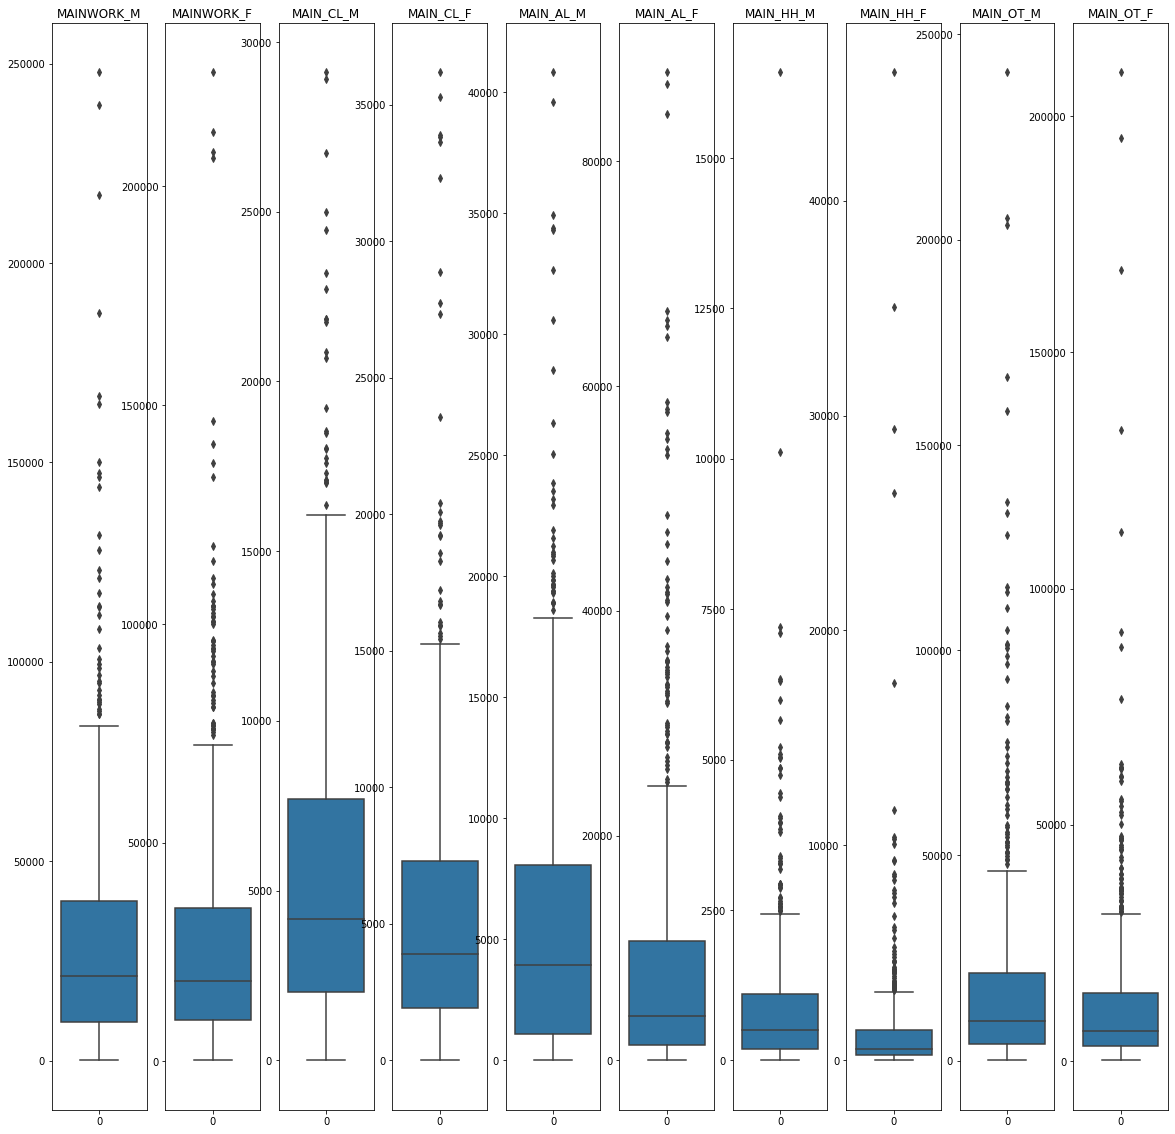

In [ ]:
print('MAIN WORK DISTRIBUTION')

columns_to_plot =df_mainwork.columns
fig, axes = plt.subplots(ncols=len(columns_to_plot),figsize=(20,20))
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df_mainwork[column], ax=axis) 
        axis.set_title(column)
    
plt.show()

MARGINAL WORK DISTRIBUTION


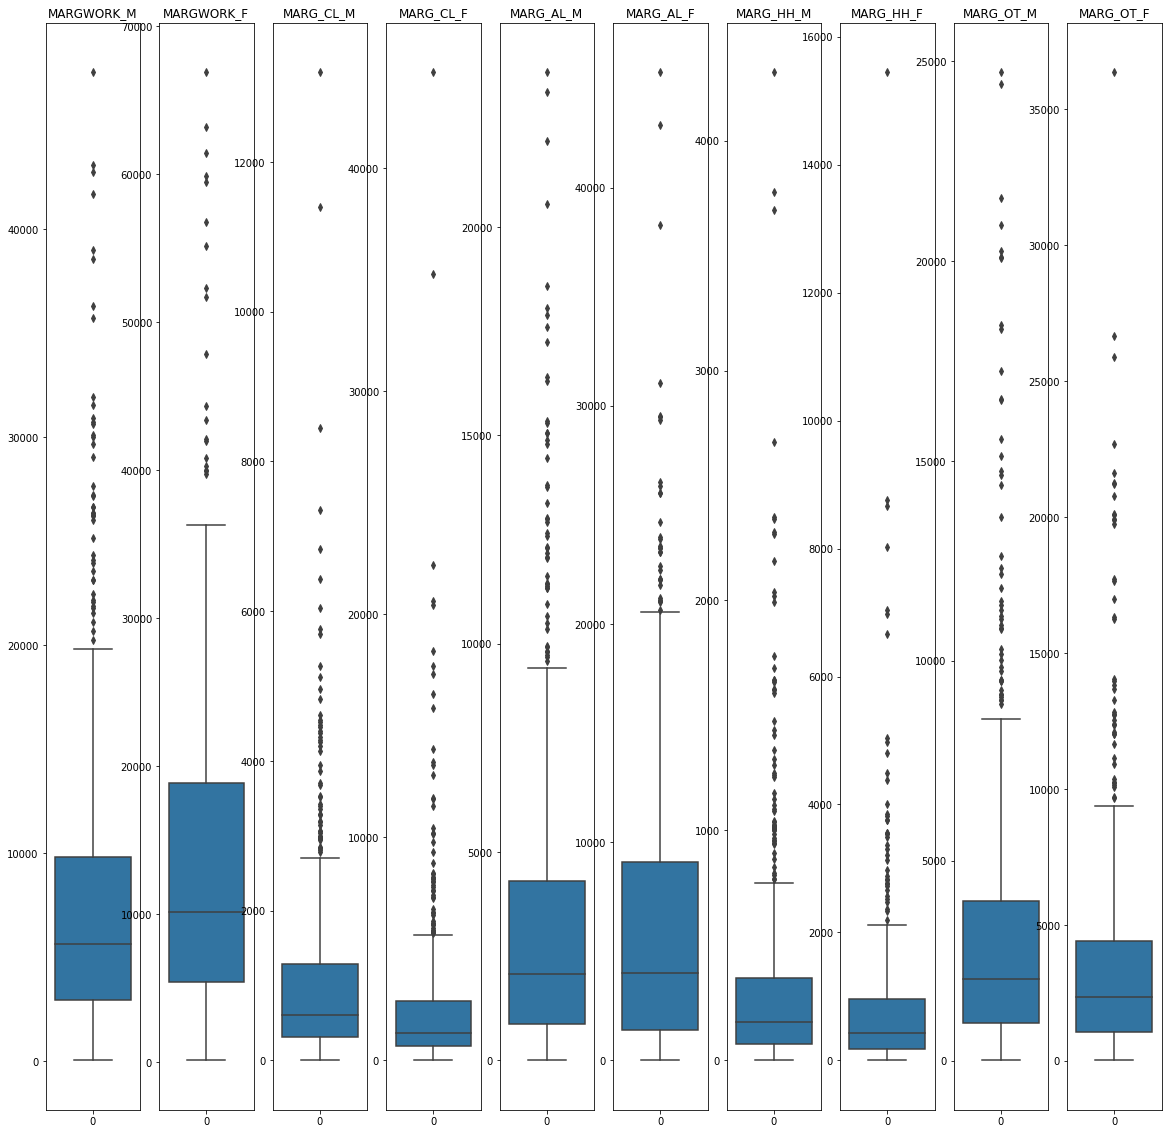

In [ ]:
print('MARGINAL WORK DISTRIBUTION')

columns_to_plot =df_marginwork.columns
fig, axes = plt.subplots(ncols=len(columns_to_plot),figsize=(20,20))

for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df_marginwork[column], ax=axis) 
        axis.set_title(column)
    
plt.show()

<AxesSubplot:title={'center':'NON WORKING COUNT'}>

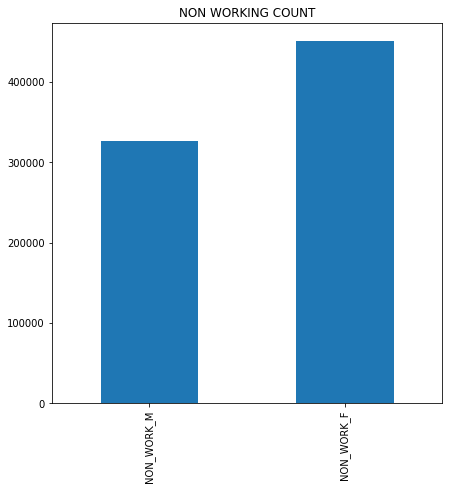

In [ ]:
plt.figure(figsize=(7,7))
plt.title('NON WORKING COUNT')
df_nonwork=df[['NON_WORK_M','NON_WORK_F']]
df_nonwork.sum().plot(kind='bar')



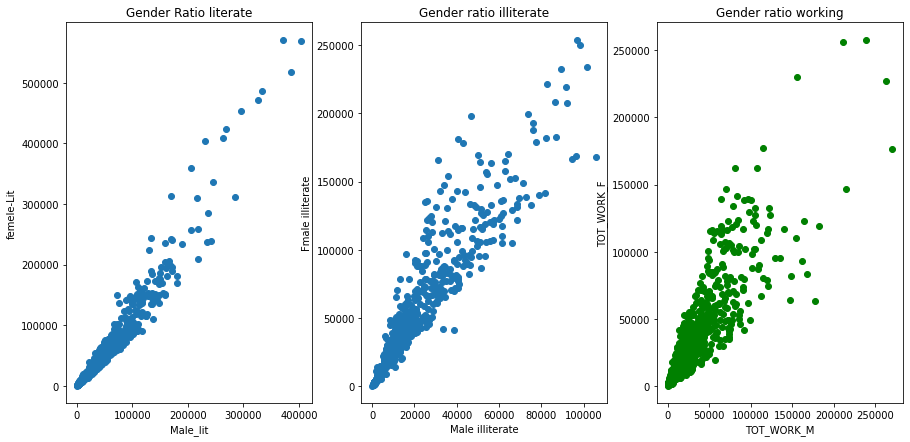

In [ ]:
print('GENDER BASED SPREAD WORKING,LITERATE,NON LITERATE PEOPLE')
axes[0].scatter(df['M_LIT'],df['F_LIT'],cmap='orange')
axes[0].set_xlabel('Male_lit')
axes[0].set_ylabel('femele-Lit')
axes[0].set_title('Gender Ratio literate')
axes[1].scatter(df['M_ILL'],df['F_ILL'],cmap='yellow')
axes[1].set_xlabel('Male illiterate')
axes[1].set_ylabel('Fmale illiterate')
axes[1].set_title('Gender ratio illiterate')
axes[2].scatter(df['TOT_WORK_M'], df['TOT_WORK_F'], c="green")
axes[2].set_xlabel('TOT_WORK_M')
axes[2].set_ylabel('TOT_WORK_F')
axes[2].set_title('Gender ratio working')
plt.show()
